In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

%cd /content/drive/MyDrive/Project_Watermarking

/content/drive/MyDrive/Project_Watermarking


In [ ]:
pwd

'/content/drive/MyDrive/Project_Watermarking'

# **Embedding**

Load Libraries

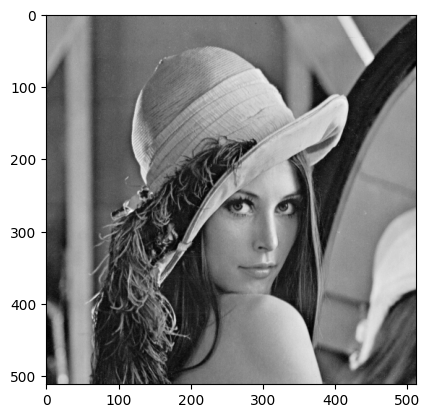

Image shape (512, 512)


In [ ]:
import numpy as np
import random
import pywt
import pywt.data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageDraw, ImageFont
import cv2
from google.colab.patches import cv2_imshow

# Read and display Host image
img = cv2.imread('lena.png',2)
plt.imshow(img, cmap='gray')
plt.show()
print("Image shape", img.shape)







In [ ]:
print(img.min())


25


In [ ]:
print(img.max())


245


In [ ]:
img = img.astype('float')
img /= 255.0



In [ ]:
# watermark = plt.imread('du64.bmp')
# plt.imshow(watermark)
# plt.show()
# print("Watermark shape", watermark.shape)

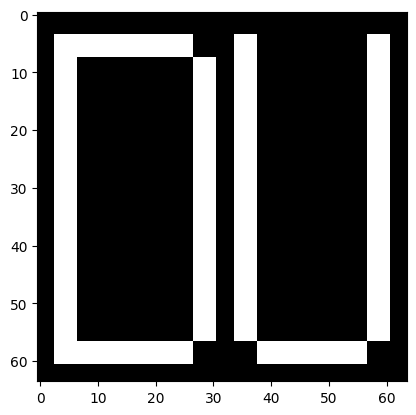

Watermark shape (64, 64)


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

watermark = cv2.imread('du64.bmp', 2)

# ret, thresh1 = cv2.threshold(watermark,127, 255,cv2.THRESH_BINARY)
# images = [img, thresh1]

plt.imshow(watermark,cmap='gray')
plt.show()
print("Watermark shape", watermark.shape)

In [ ]:
watermark.max()

255

In [ ]:
watermark.min()

0

In [ ]:
watermark = watermark.astype('float')
watermark /= 255.0

Transform Image

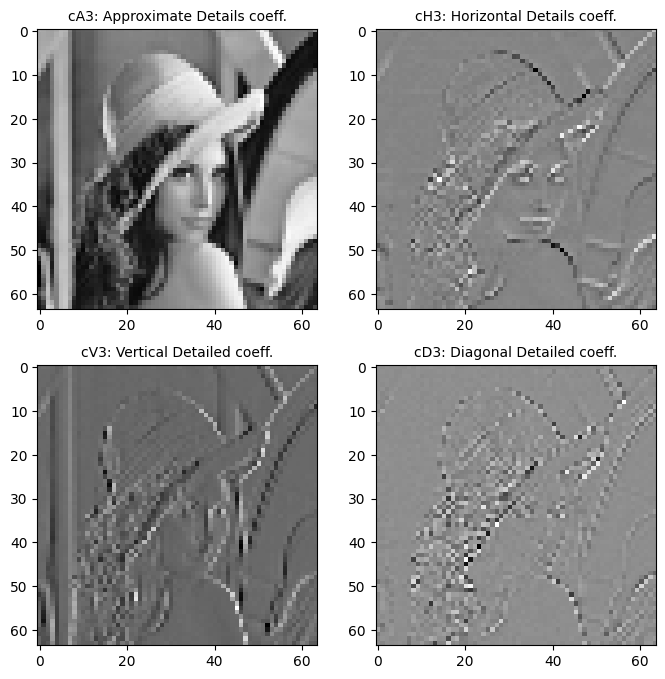

In [ ]:
C = pywt.wavedec2(img, 'haar', level=3)
# imgr=pywt.waverec2(C, 'haar', mode = 'periodization')
# imgr=np.uint8(imgr)
C1 = pywt.wavedec2(img, 'haar', level = 3)
C2 = pywt.wavedec2(img, 'haar', level = 3)

#Extracting coefficients
cA = C[0]
originalcA=cA.copy()                                # required for extraction
(cH3,cV3, cD3) = C[-3]
(cH2, cV2, cD2) = C[-2]
(cH1, cV1, cD1) = C[-1]


#plotting wavelet coefficients of level 3
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(cA, cmap = plt.cm.gray)
plt.title('cA3: Approximate Details coeff.', fontsize=10)

plt.subplot(2,2,2)
plt.imshow(cH3,cmap = plt.cm.gray)
plt.title('cH3: Horizontal Details coeff.', fontsize=10)

plt.subplot(2,2,3)
plt.imshow(cV3, cmap=plt.cm.gray)
plt.title('cV3: Vertical Detailed coeff.', fontsize=10)

plt.subplot(2,2,4)
plt.imshow(cD3, cmap=plt.cm.gray)
plt.title('cD3: Diagonal Detailed coeff.', fontsize=10)

plt.show()

In [ ]:
print(cA.shape)


(64, 64)


In [ ]:

# mult = watermark*0.1                        # embedding strength 0.1
alpha=0.1
A = cA+watermark*alpha
print('Multipy watermark to 0.1', A)
print(A.shape)

Multipy watermark to 0.1 [[5.03333333 4.99117647 4.89019608 ... 3.92303922 3.77352941 4.25245098]
 [4.90882353 4.93823529 4.88872549 ... 4.04460784 3.05833333 1.56617647]
 [4.8872549  4.93823529 4.91568627 ... 2.92009804 1.52990196 1.51372549]
 ...
 [2.14509804 3.33627451 5.30735294 ... 3.19019608 2.12156863 1.89215686]
 [1.75539216 2.58333333 5.64558824 ... 2.61078431 1.83627451 1.74019608]
 [1.58823529 2.17794118 6.01617647 ... 1.7495098  1.81666667 2.73039216]]
(64, 64)


Text(0.5, 1.0, 'Reconstruct image')

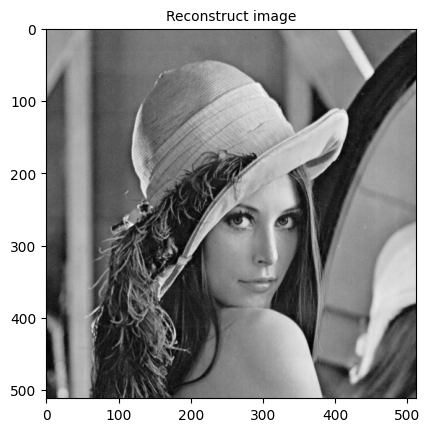

In [ ]:
import cv2

C[0]=A
imgr_signed=pywt.waverec2(C, 'haar')
# imgr_signed=np.ceil(imgr_signed*(max-min)+min)
imgr_signed = np.ceil(imgr_signed*255)
imgr_signed = imgr_signed.clip(0, 255)
# imgr_signed=np.uint8(imgr_signed)
imgr_signed = imgr_signed.astype("uint8")

plt.imshow(imgr_signed,cmap='gray')
plt.title('Reconstruct image', fontsize=10)



In [ ]:
# saving signed image
# plt.imsave('lena_signed.png',imgr_signed,cmap='gray')

cv2.imwrite('lena_signed.png',imgr_signed)


True

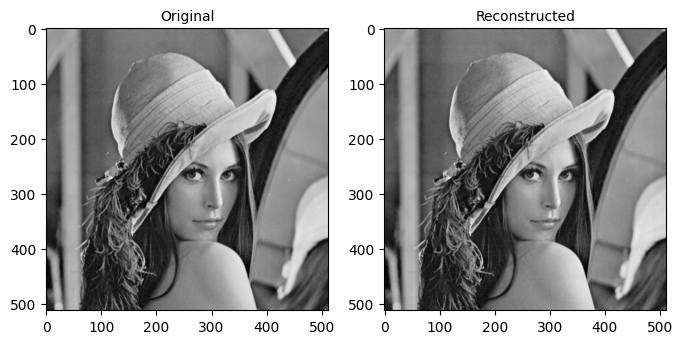

In [ ]:
#plotting wavelet coefficients of level 3
img_org = cv2.imread('lena.png',2)
img

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(img, cmap = plt.cm.gray)
plt.title('Original', fontsize=10)

plt.subplot(1,2,2)
plt.imshow(imgr_signed,cmap = plt.cm.gray)
plt.title('Reconstructed', fontsize=10)

plt.show()

In [ ]:
#Calculate PSNR and SSIM Between img and imgr_signed
from skimage.metrics import peak_signal_noise_ratio
from skimage.metrics import structural_similarity
import math
import cv2
import numpy as np

img_org = cv2.imread("lena.png",2)
imgr_signed = cv2.imread("lena_signed.png",2)

psnr=peak_signal_noise_ratio(img_org, imgr_signed)
psnr

41.16927250698785

In [ ]:
ssim=structural_similarity(img_org, imgr_signed)
ssim

0.9984045871301144

# **Extraction**

In [ ]:
imgr_signed = cv2.imread("lena_signed.png", 2)


In [ ]:
imgr_signed = imgr_signed.astype('float')
imgr_signed/=255.0

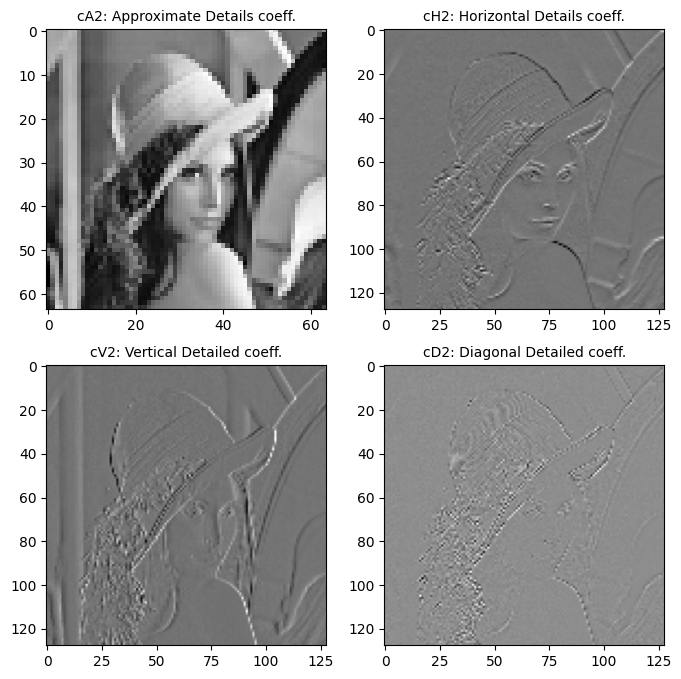

In [ ]:
#Apply 3 level DWT on imgr_signed

C = pywt.wavedec2(imgr_signed, 'haar', level=3)

#Extracting coefficients
cA = C[0]
(cH3,cV3, cD3) = C[-3]
(cH2, cV2, cD2) = C[-2]
(cH1, cV1, cD1) = C[-1]

#plotting wavelet coefficients of level 3
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(cA, cmap = plt.cm.gray)
plt.title('cA2: Approximate Details coeff.', fontsize=10)

plt.subplot(2,2,2)
plt.imshow(cH2,cmap = plt.cm.gray)
plt.title('cH2: Horizontal Details coeff.', fontsize=10)

plt.subplot(2,2,3)
plt.imshow(cV2, cmap=plt.cm.gray)
plt.title('cV2: Vertical Detailed coeff.', fontsize=10)

plt.subplot(2,2,4)
plt.imshow(cD2, cmap=plt.cm.gray)
plt.title('cD2: Diagonal Detailed coeff.', fontsize=10)

plt.show()


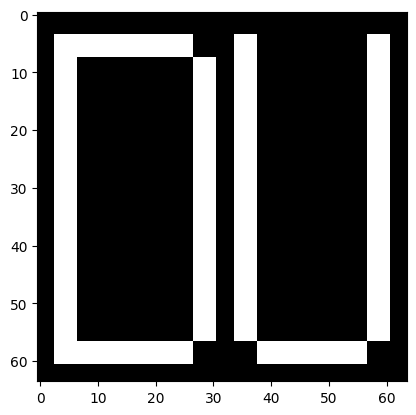

In [ ]:
#W_extracted=(cA-cAoriginal)/0.1

# cA = C[0]
W_extracted = np.absolute(cA-originalcA)/alpha
W_extracted = np.around(W_extracted)
extracted_wtrmk = W_extracted *255

extracted_wtrmk=np.uint8(extracted_wtrmk)

# diff_wm_or_b_ca = diff_wm_or_b_ca.astype("uint8")


# W_extracted = plt.imread('du641.bmp')
plt.imshow(extracted_wtrmk*255, cmap = 'gray')
plt.show()



# print(extracted_wtrmk)

# plt.show()

In [ ]:
cv2.imwrite('extractedWm.bmp', extracted_wtrmk)

True

In [ ]:
# Compute NCC in between Original image and Extracted image

org_wm = cv2.imread('du64.bmp',2)
W_extracted = cv2.imread('extractedWm.bmp',2)

def normalized_corr_coeff(org_wm, ext_wm):
  wm_mult = org_wm * ext_wm
  mult_sum = np.sum(wm_mult)
  dinom = math.sqrt(np.sum(org_wm ** 2)) * math.sqrt(np.sum(ext_wm ** 2))
  return mult_sum/dinom



d = normalized_corr_coeff(org_wm,W_extracted)
print(d)


0.9999999999999998


In [ ]:
# #Calculate BER (Bit-Error-Rate) in between Original Image and Extracted Image
# org_wm = cv2.imread('du64.bmp',2)
# W_extracted = cv2.imread('extractedWm.bmp',2)

def bit_error_rate(org_wm, ext_wm):
  xor_wm = org_wm.astype('int') ^ ext_wm.astype('int')
  xor_sum = np.sum(xor_wm)
  dimen = org_wm.shape[0] * org_wm.shape[1]
  return xor_sum/dimen

Result = bit_error_rate(org_wm,W_extracted)
print(Result)

0.0


# **================= Applying attacks =========================**

In [ ]:
pip install scikit-image

### **Attack-1: Salt and pepper noise**

## **Attack-1: Salt and pepper with amount=0.001**

In [ ]:
from skimage.util import random_noise
imgr_signed = cv2.imread('lena_signed.png', 2)

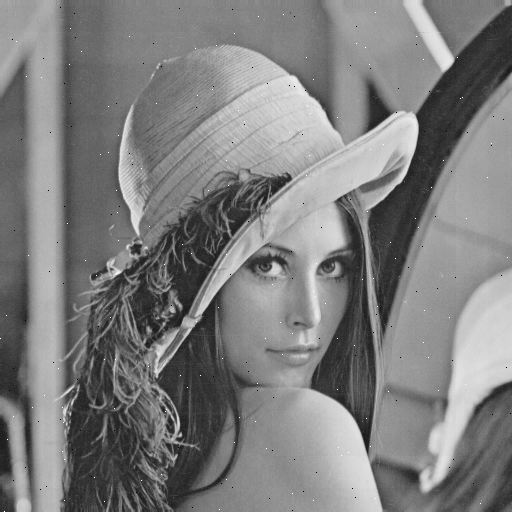

In [ ]:
#salt and peper noise
lena_sp = random_noise(imgr_signed, mode = 's&p', amount = 0.001)
lena_sp = lena_sp*255
lena_sp = lena_sp.astype('uint8')
cv2_imshow(lena_sp)

In [ ]:
cv2.imwrite('lena_sp0.001.png', lena_sp)

True

In [ ]:
lena_sp = lena_sp.astype('float')
lena_sp/=255.0

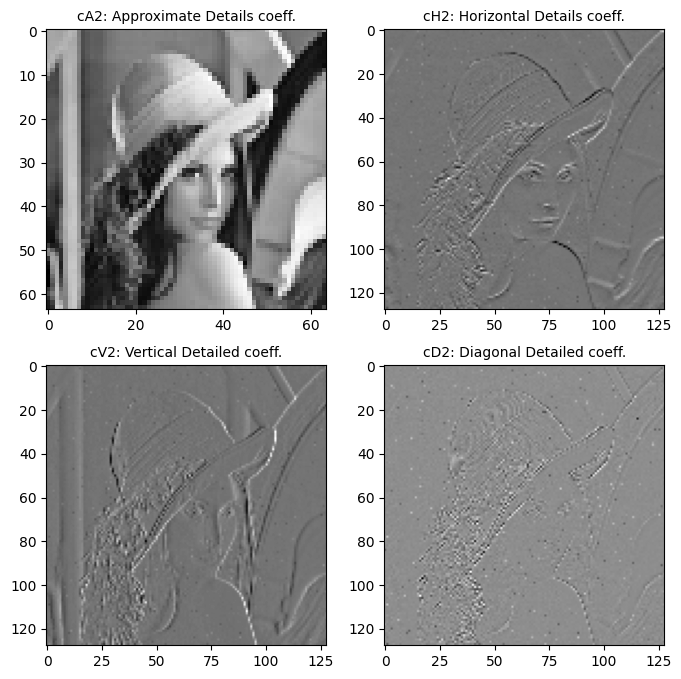

In [ ]:
#Apply 3 level DWT on imgr_signed

C = pywt.wavedec2(lena_sp, 'haar', level=3)

#Extracting coefficients
cA = C[0]
(cH3,cV3, cD3) = C[-3]
(cH2, cV2, cD2) = C[-2]
(cH1, cV1, cD1) = C[-1]

#plotting wavelet coefficients of level 3
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(cA, cmap = plt.cm.gray)
plt.title('cA2: Approximate Details coeff.', fontsize=10)

plt.subplot(2,2,2)
plt.imshow(cH2,cmap = plt.cm.gray)
plt.title('cH2: Horizontal Details coeff.', fontsize=10)

plt.subplot(2,2,3)
plt.imshow(cV2, cmap=plt.cm.gray)
plt.title('cV2: Vertical Detailed coeff.', fontsize=10)

plt.subplot(2,2,4)
plt.imshow(cD2, cmap=plt.cm.gray)
plt.title('cD2: Diagonal Detailed coeff.', fontsize=10)

plt.show()


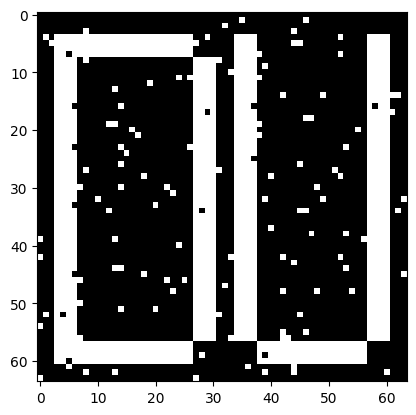

In [ ]:
# cA = C[0]
W_extracted = np.absolute(cA-originalcA)/alpha
W_extracted = np.around(W_extracted)
extracted_wtrmk = W_extracted *255
extracted_wtrmk = extracted_wtrmk.clip(0, 255)
extracted_wtrmk=np.uint8(extracted_wtrmk)


plt.imshow(extracted_wtrmk*255, cmap = 'gray')
plt.show()


In [ ]:
cv2.imwrite('SP0.001extractedWm.bmp', extracted_wtrmk)


True

In [ ]:
# Compute NCC and BER in between Original image and Extracted image

org_wm = cv2.imread('du64.bmp',2)/255
W_extracted = cv2.imread('SP0.001extractedWm.bmp',2)/255

def normalized_corr_coeff(org_wm, ext_wm):
  wm_mult = org_wm * ext_wm
  mult_sum = np.sum(wm_mult)
  dinom = math.sqrt(np.sum(org_wm ** 2)) * math.sqrt(np.sum(ext_wm ** 2))
  return mult_sum/dinom

# def normalized_corr_coeff(org_wm, W_extracted):
#   wm_mult = org_wm * W_extracted
#   mult_sum = np.sum(wm_mult)
#   dinom = math.sqrt(np.sum(org_wm * 2)) * math.sqrt(np.sum(W_extracted * 2))
#   return mult_sum/dinom

d = normalized_corr_coeff(org_wm,W_extracted)
print(d)

0.9453638224549435


In [ ]:
# #Calculate BER (Bit-Error-Rate) in between Original Image and Extracted Image
# org_wm = cv2.imread('du64.bmp',2)
# W_extracted = cv2.imread('extractedWm.bmp',2)


def bit_error_rate(org_wm, ext_wm):
  xor_wm = org_wm.astype('int') ^ ext_wm.astype('int')
  xor_sum = np.sum(xor_wm)
  dimen = org_wm.shape[0] * org_wm.shape[1]
  return xor_sum/dimen

Result = bit_error_rate(org_wm,W_extracted)
print(Result)

0.03076171875


## **Attack-1: Salt and pepper with amount=0.005**

In [ ]:
imgr_signed = cv2.imread('lena_signed.png', 2)


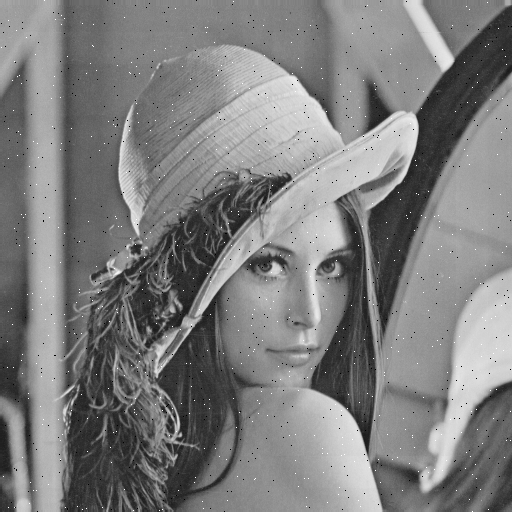

In [ ]:
#salt and peper noise
lena_sp = random_noise(imgr_signed, mode = 's&p', amount = 0.005)
lena_sp = lena_sp*255
lena_sp = lena_sp.astype('uint8')
cv2_imshow(lena_sp)

In [ ]:
cv2.imwrite('lena_sp0.005.png', lena_sp)

True

In [ ]:
lena_sp = lena_sp.astype('float')
lena_sp/=255.0

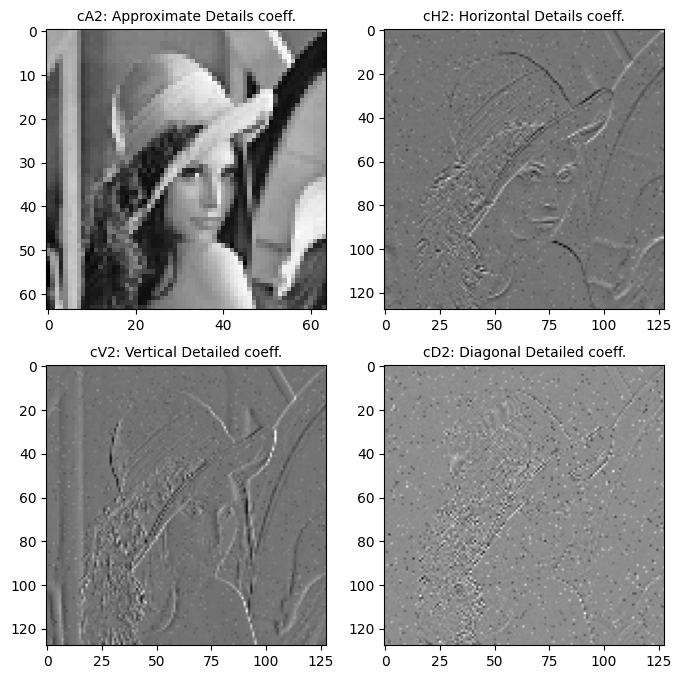

In [ ]:
#Apply 3 level DWT on imgr_signed

C = pywt.wavedec2(lena_sp, 'haar', level=3)

#Extracting coefficients
cA = C[0]
(cH3,cV3, cD3) = C[-3]
(cH2, cV2, cD2) = C[-2]
(cH1, cV1, cD1) = C[-1]

#plotting wavelet coefficients of level 3
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(cA, cmap = plt.cm.gray)
plt.title('cA2: Approximate Details coeff.', fontsize=10)

plt.subplot(2,2,2)
plt.imshow(cH2,cmap = plt.cm.gray)
plt.title('cH2: Horizontal Details coeff.', fontsize=10)

plt.subplot(2,2,3)
plt.imshow(cV2, cmap=plt.cm.gray)
plt.title('cV2: Vertical Detailed coeff.', fontsize=10)

plt.subplot(2,2,4)
plt.imshow(cD2, cmap=plt.cm.gray)
plt.title('cD2: Diagonal Detailed coeff.', fontsize=10)

plt.show()


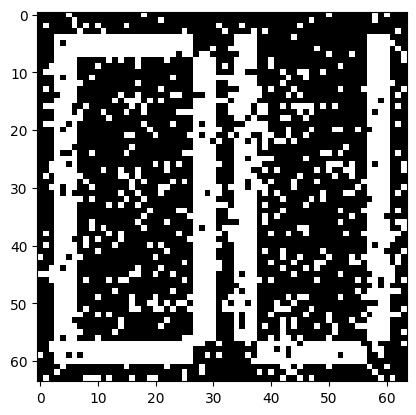

In [ ]:
# cA = C[0]
W_extracted = np.absolute(cA-originalcA)/alpha
W_extracted = np.around(W_extracted)
extracted_wtrmk = W_extracted *255
extracted_wtrmk = extracted_wtrmk.clip(0, 255)
extracted_wtrmk=np.uint8(extracted_wtrmk)

# diff_wm_or_b_ca = diff_wm_or_b_ca.astype("uint8")


# W_extracted = plt.imread('du641.bmp')
plt.imshow(extracted_wtrmk*255, cmap = 'gray')
plt.show()



In [ ]:
cv2.imwrite('SP0.005extractedWm.bmp', extracted_wtrmk)


True

In [ ]:
# Compute NCC and BER in between Original image and Extracted image

org_wm = cv2.imread('du64.bmp',2)/255
W_extracted = cv2.imread('SP0.005extractedWm.bmp',2)/255

def normalized_corr_coeff(org_wm, ext_wm):
  wm_mult = org_wm * ext_wm
  mult_sum = np.sum(wm_mult)
  dinom = math.sqrt(np.sum(org_wm ** 2)) * math.sqrt(np.sum(ext_wm ** 2))
  return mult_sum/dinom



d = normalized_corr_coeff(org_wm,W_extracted)
print(d)

0.7957878937346771


In [ ]:
# #Calculate BER (Bit-Error-Rate) in between Original Image and Extracted Image
# org_wm = cv2.imread('du64.bmp',2)
# W_extracted = cv2.imread('extractedWm.bmp',2)

def bit_error_rate(org_wm, ext_wm):
  xor_wm = org_wm.astype('int') ^ ext_wm.astype('int')
  xor_sum = np.sum(xor_wm)
  dimen = org_wm.shape[0] * org_wm.shape[1]
  return xor_sum/dimen

Result = bit_error_rate(org_wm,W_extracted)
print(Result)

0.13427734375


## **Attack 2: Gaussian noise (0.001)**

In [ ]:
imgr_signed = cv2.imread('lena_signed.png', 2)


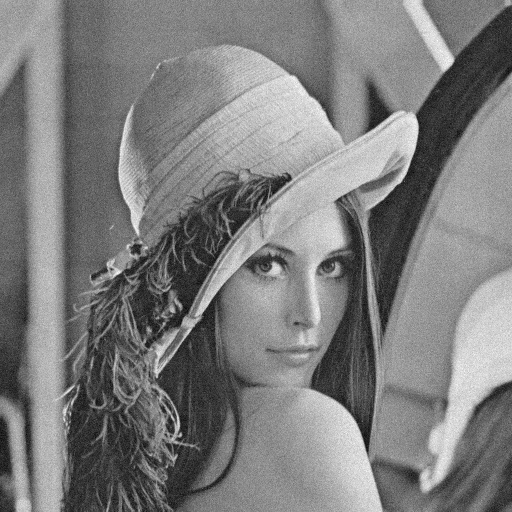

In [ ]:
lena_gaus = random_noise(imgr_signed, mode = 'gaussian', mean = 0, var = 0.001)
lena_gaus = lena_gaus*255
lena_gaus = lena_gaus.astype('uint8')
cv2_imshow(lena_gaus)

In [ ]:
cv2.imwrite('lena_gaus0.001.png', lena_gaus)

True

In [ ]:
lena_gaus = lena_gaus.astype('float')
lena_gaus/=255.0

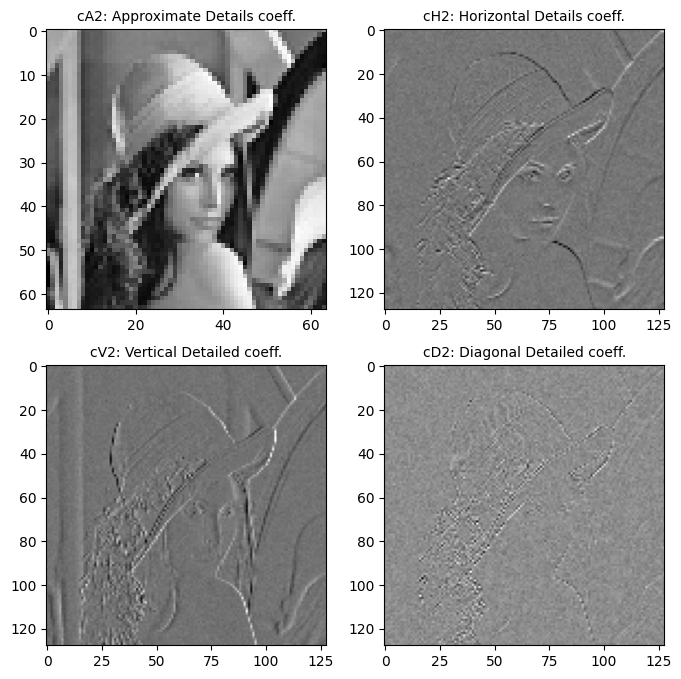

In [ ]:
#Apply 3 level DWT on imgr_signed

C = pywt.wavedec2(lena_gaus, 'haar', level=3)

#Extracting coefficients
cA = C[0]
(cH3,cV3, cD3) = C[-3]
(cH2, cV2, cD2) = C[-2]
(cH1, cV1, cD1) = C[-1]

#plotting wavelet coefficients of level 3
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(cA, cmap = plt.cm.gray)
plt.title('cA2: Approximate Details coeff.', fontsize=10)

plt.subplot(2,2,2)
plt.imshow(cH2,cmap = plt.cm.gray)
plt.title('cH2: Horizontal Details coeff.', fontsize=10)

plt.subplot(2,2,3)
plt.imshow(cV2, cmap=plt.cm.gray)
plt.title('cV2: Vertical Detailed coeff.', fontsize=10)

plt.subplot(2,2,4)
plt.imshow(cD2, cmap=plt.cm.gray)
plt.title('cD2: Diagonal Detailed coeff.', fontsize=10)

plt.show()


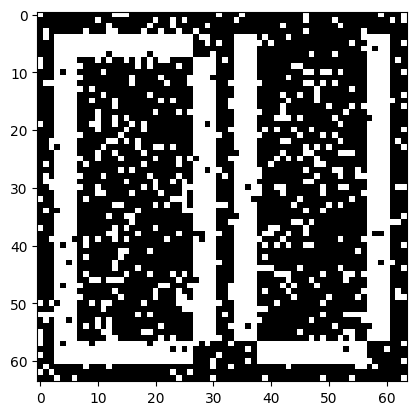

In [ ]:
# cA = C[0]
W_extracted = np.absolute(cA-originalcA)/alpha
W_extracted = np.around(W_extracted)
extracted_wtrmk = W_extracted *255
extracted_wtrmk = extracted_wtrmk.clip(0, 255)
extracted_wtrmk=np.uint8(extracted_wtrmk)

# diff_wm_or_b_ca = diff_wm_or_b_ca.astype("uint8")


# W_extracted = plt.imread('du641.bmp')
plt.imshow(extracted_wtrmk *255, cmap = 'gray')
plt.show()


In [ ]:
cv2.imwrite('Gaus0.001extractedWm.bmp', extracted_wtrmk)


True

In [ ]:
# Compute NCC and BER in between Original image and Extracted image

org_wm = cv2.imread('du64.bmp',2)/255
W_extracted = cv2.imread('Gaus0.001extractedWm.bmp',2)/255

def normalized_corr_coeff(org_wm, ext_wm):
  wm_mult = org_wm * ext_wm
  mult_sum = np.sum(wm_mult)
  dinom = math.sqrt(np.sum(org_wm ** 2)) * math.sqrt(np.sum(ext_wm ** 2))
  return mult_sum/dinom

# def normalized_corr_coeff(org_wm, W_extracted):
#   wm_mult = org_wm * W_extracted
#   mult_sum = np.sum(wm_mult)
#   dinom = math.sqrt(np.sum(org_wm * 2)) * math.sqrt(np.sum(W_extracted * 2))
#   return mult_sum/dinom

d = normalized_corr_coeff(org_wm,W_extracted)
print(d)

0.8156365704605809


In [ ]:
# #Calculate BER (Bit-Error-Rate) in between Original Image and Extracted Image


def bit_error_rate(org_wm, ext_wm):
  xor_wm = org_wm.astype('int') ^ ext_wm.astype('int')
  xor_sum = np.sum(xor_wm)
  dimen = org_wm.shape[0] * org_wm.shape[1]
  return xor_sum/dimen

Result = bit_error_rate(org_wm,W_extracted)
print(Result)

0.124755859375


## **Attack 2: Gaussian noise (0.002)**

In [ ]:
imgr_signed = cv2.imread('lena_signed.png', 2)
imgr_signed1 = cv2.imread('Couple_signed.png', 2)
imgr_signed2 = cv2.imread('Aerial_signed.png', 2)

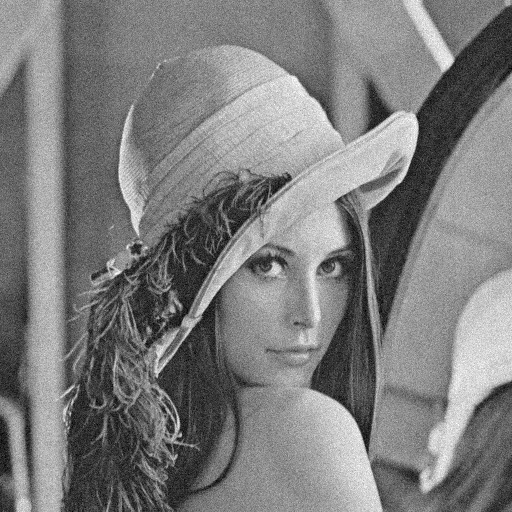

In [ ]:
lena_gaus = random_noise(imgr_signed, mode = 'gaussian', mean = 0, var = 0.002)
lena_gaus = lena_gaus*255
lena_gaus = lena_gaus.astype('uint8')
cv2_imshow(lena_gaus)

In [ ]:
cv2.imwrite('lena_gaus0.002.png', lena_gaus)

True

In [ ]:
lena_gaus = lena_gaus.astype('float')
lena_gaus/=255.0

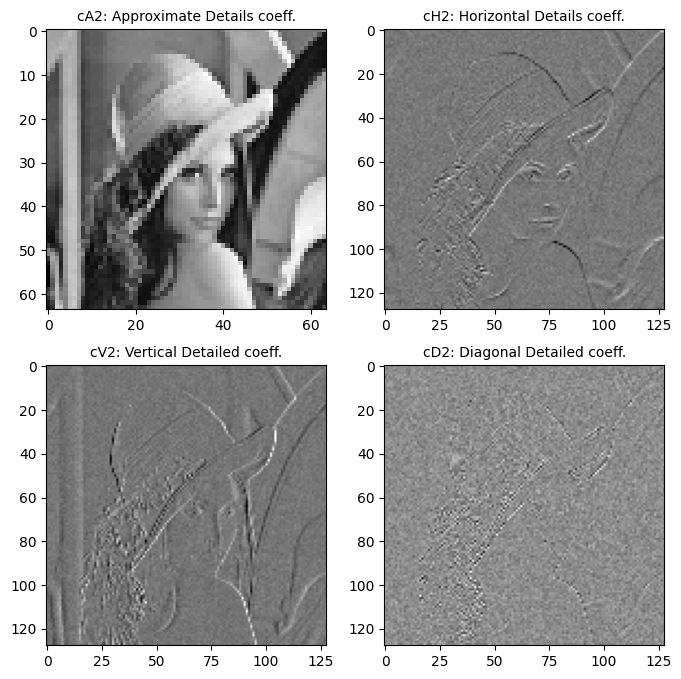

In [ ]:
#Apply 3 level DWT on imgr_signed

C = pywt.wavedec2(lena_gaus, 'haar', level=3)

#Extracting coefficients
cA = C[0]
(cH3,cV3, cD3) = C[-3]
(cH2, cV2, cD2) = C[-2]
(cH1, cV1, cD1) = C[-1]

#plotting wavelet coefficients of level 3
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(cA, cmap = plt.cm.gray)
plt.title('cA2: Approximate Details coeff.', fontsize=10)

plt.subplot(2,2,2)
plt.imshow(cH2,cmap = plt.cm.gray)
plt.title('cH2: Horizontal Details coeff.', fontsize=10)

plt.subplot(2,2,3)
plt.imshow(cV2, cmap=plt.cm.gray)
plt.title('cV2: Vertical Detailed coeff.', fontsize=10)

plt.subplot(2,2,4)
plt.imshow(cD2, cmap=plt.cm.gray)
plt.title('cD2: Diagonal Detailed coeff.', fontsize=10)

plt.show()


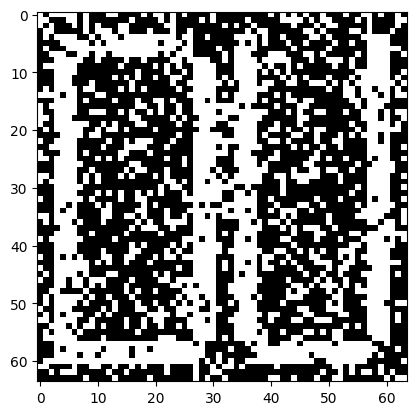

In [ ]:
# cA = C[0]
W_extracted = np.absolute(cA-originalcA)/alpha
W_extracted = np.around(W_extracted)
extracted_wtrmk = W_extracted *255
extracted_wtrmk = extracted_wtrmk.clip(0, 255)
extracted_wtrmk=np.uint8(extracted_wtrmk)

# diff_wm_or_b_ca = diff_wm_or_b_ca.astype("uint8")


# W_extracted = plt.imread('du641.bmp')
plt.imshow(extracted_wtrmk*255, cmap = 'gray')
plt.show()



# print(extracted_wtrmk)

# plt.show()

In [ ]:
cv2.imwrite('Gaus0.002extractedWm.bmp', extracted_wtrmk)


True

In [ ]:
# Compute NCC and BER in between Original image and Extracted image

org_wm = cv2.imread('du64.bmp',2)/255
W_extracted = cv2.imread('Gaus0.002extractedWm.bmp',2)/255

def normalized_corr_coeff(org_wm, ext_wm):
  wm_mult = org_wm * ext_wm
  mult_sum = np.sum(wm_mult)
  dinom = math.sqrt(np.sum(org_wm ** 2)) * math.sqrt(np.sum(ext_wm ** 2))
  return mult_sum/dinom

# def normalized_corr_coeff(org_wm, W_extracted):
#   wm_mult = org_wm * W_extracted
#   mult_sum = np.sum(wm_mult)
#   dinom = math.sqrt(np.sum(org_wm * 2)) * math.sqrt(np.sum(W_extracted * 2))
#   return mult_sum/dinom

d = normalized_corr_coeff(org_wm,W_extracted)
print(d)

0.6860829627874231


In [ ]:
# #Calculate BER (Bit-Error-Rate) in between Original Image and Extracted Image
# org_wm = cv2.imread('du64.bmp',2)
# W_extracted = cv2.imread('extractedWm.bmp',2)

def bit_error_rate(org_wm, ext_wm):
  xor_wm = org_wm.astype('int') ^ ext_wm.astype('int')
  xor_sum = np.sum(xor_wm)
  dimen = org_wm.shape[0] * org_wm.shape[1]
  return xor_sum/dimen

Result = bit_error_rate(org_wm,W_extracted)
print(Result)

0.2412109375


**=======================================================================**

# **Attack-3: Median filtering**

In [ ]:
#Median Filtering apply on signed iamge
from PIL import Image, ImageFilter
import numpy as np

imgr_signed = cv2.imread('lena_signed.png', 2)



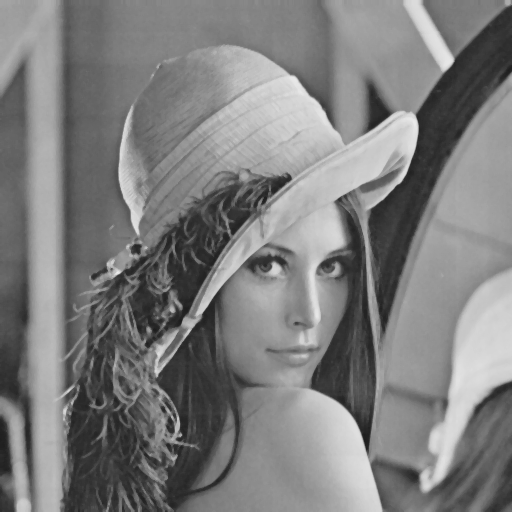

In [ ]:
size=3
lena_median = cv2.medianBlur(imgr_signed, size)
cv2_imshow(lena_median)



In [ ]:
cv2.imwrite('lena_median3.png', lena_median)

True

In [ ]:
lena_median = lena_median.astype('float')
lena_median/=255.0



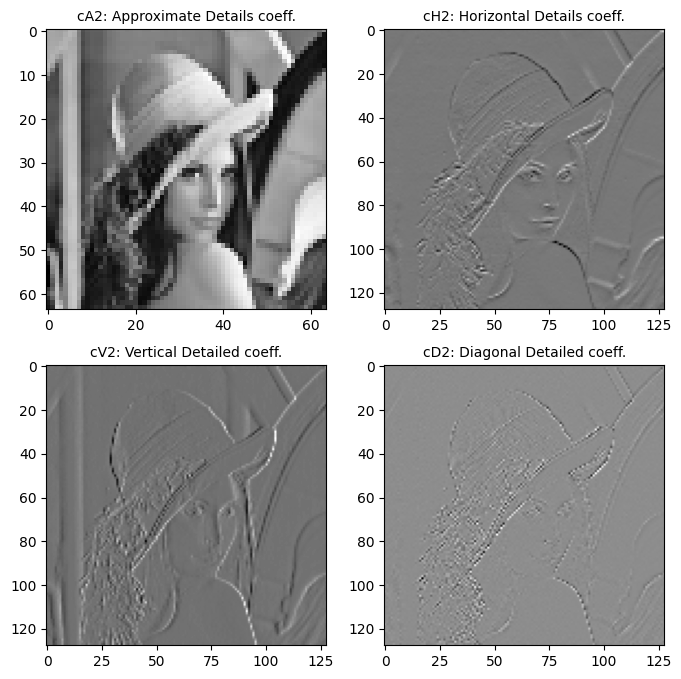

In [ ]:
#Apply 3 level DWT on imgr_signed

C = pywt.wavedec2(lena_median, 'haar', level=3)

#Extracting coefficients
cA = C[0]
(cH3,cV3, cD3) = C[-3]
(cH2, cV2, cD2) = C[-2]
(cH1, cV1, cD1) = C[-1]

#plotting wavelet coefficients of level 3
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(cA, cmap = plt.cm.gray)
plt.title('cA2: Approximate Details coeff.', fontsize=10)

plt.subplot(2,2,2)
plt.imshow(cH2,cmap = plt.cm.gray)
plt.title('cH2: Horizontal Details coeff.', fontsize=10)

plt.subplot(2,2,3)
plt.imshow(cV2, cmap=plt.cm.gray)
plt.title('cV2: Vertical Detailed coeff.', fontsize=10)

plt.subplot(2,2,4)
plt.imshow(cD2, cmap=plt.cm.gray)
plt.title('cD2: Diagonal Detailed coeff.', fontsize=10)

plt.show()


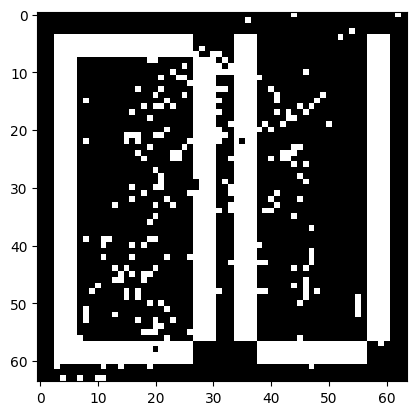

In [ ]:
# cA = C[0]
W_extracted = np.absolute(cA-originalcA)/alpha
W_extracted = np.around(W_extracted)
extracted_wtrmk = W_extracted *255
extracted_wtrmk = extracted_wtrmk.clip(0, 255)
extracted_wtrmk=np.uint8(extracted_wtrmk)

# diff_wm_or_b_ca = diff_wm_or_b_ca.astype("uint8")


# W_extracted = plt.imread('du641.bmp')
plt.imshow(extracted_wtrmk*255, cmap = 'gray')
plt.show()



# print(extracted_wtrmk)

# plt.show()

In [ ]:
cv2.imwrite('Median3extractedWm.bmp', extracted_wtrmk)



True

In [ ]:
# Compute NCC and BER in between Original image and Extracted image

org_wm = cv2.imread('du64.bmp',2)/255
W_extracted = cv2.imread('Median3extractedWm.bmp',2)/255

def normalized_corr_coeff(org_wm, ext_wm):
  wm_mult = org_wm * ext_wm
  mult_sum = np.sum(wm_mult)
  dinom = math.sqrt(np.sum(org_wm ** 2)) * math.sqrt(np.sum(ext_wm ** 2))
  return mult_sum/dinom

# def normalized_corr_coeff(org_wm, W_extracted):
#   wm_mult = org_wm * W_extracted
#   mult_sum = np.sum(wm_mult)
#   dinom = math.sqrt(np.sum(org_wm * 2)) * math.sqrt(np.sum(W_extracted * 2))
#   return mult_sum/dinom

d = normalized_corr_coeff(org_wm,W_extracted)
print(d)

0.9157897665139936


In [ ]:
# #Calculate BER (Bit-Error-Rate) in between Original Image and Extracted Image
# org_wm = cv2.imread('du64.bmp',2)
# W_extracted = cv2.imread('extractedWm.bmp',2)

def bit_error_rate(org_wm, ext_wm):
  xor_wm = org_wm.astype('int') ^ ext_wm.astype('int')
  xor_sum = np.sum(xor_wm)
  dimen = org_wm.shape[0] * org_wm.shape[1]
  return xor_sum/dimen

Result = bit_error_rate(org_wm,W_extracted)
print(Result)

0.050537109375


## **Attack 3: Median Filter (size=5)**

In [ ]:
#Median Filtering apply on signed iamge
from PIL import Image, ImageFilter
import numpy as np

imgr_signed = cv2.imread('lena_signed.png', 2)


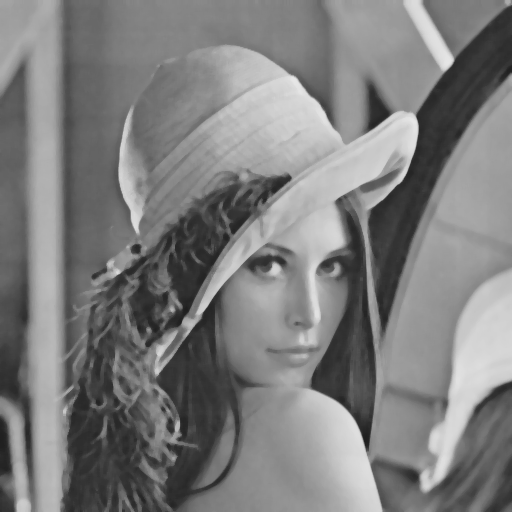

In [ ]:
size=5
lena_median = cv2.medianBlur(imgr_signed, size)
cv2_imshow(lena_median)



In [ ]:
cv2.imwrite('lena_median5.png', lena_median)

True

In [ ]:
lena_median = lena_median.astype('float')
lena_median/=255.0


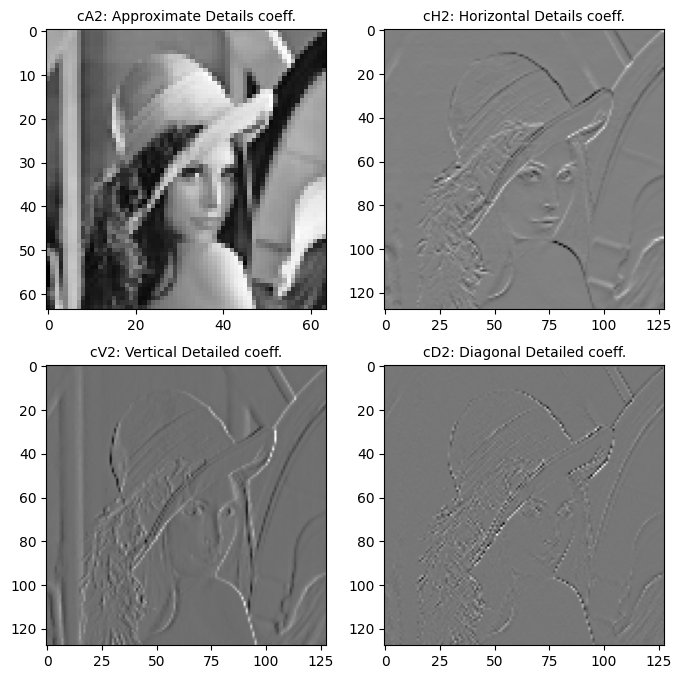

In [ ]:
#Apply 3 level DWT on imgr_signed

C = pywt.wavedec2(lena_median, 'haar', level=3)

#Extracting coefficients
cA = C[0]
(cH3,cV3, cD3) = C[-3]
(cH2, cV2, cD2) = C[-2]
(cH1, cV1, cD1) = C[-1]

#plotting wavelet coefficients of level 3
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(cA, cmap = plt.cm.gray)
plt.title('cA2: Approximate Details coeff.', fontsize=10)

plt.subplot(2,2,2)
plt.imshow(cH2,cmap = plt.cm.gray)
plt.title('cH2: Horizontal Details coeff.', fontsize=10)

plt.subplot(2,2,3)
plt.imshow(cV2, cmap=plt.cm.gray)
plt.title('cV2: Vertical Detailed coeff.', fontsize=10)

plt.subplot(2,2,4)
plt.imshow(cD2, cmap=plt.cm.gray)
plt.title('cD2: Diagonal Detailed coeff.', fontsize=10)

plt.show()


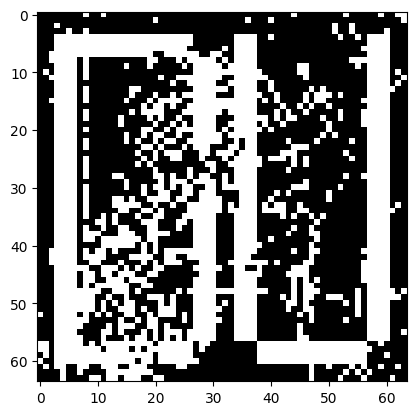

In [ ]:
# cA = C[0]
W_extracted = np.absolute(cA-originalcA)/alpha
W_extracted = np.around(W_extracted)
extracted_wtrmk = W_extracted *255
extracted_wtrmk = extracted_wtrmk.clip(0, 255)
extracted_wtrmk=np.uint8(extracted_wtrmk)

# diff_wm_or_b_ca = diff_wm_or_b_ca.astype("uint8")


# W_extracted = plt.imread('du641.bmp')
plt.imshow(extracted_wtrmk*255, cmap = 'gray')
plt.show()



# print(extracted_wtrmk)

# plt.show()

In [ ]:
# Compute NCC and BER in between Original image and Extracted image

org_wm = cv2.imread('du64.bmp',2)/255
W_extracted = cv2.imread('Median5extractedWm.bmp',2)/255

def normalized_corr_coeff(org_wm, ext_wm):
  wm_mult = org_wm * ext_wm
  mult_sum = np.sum(wm_mult)
  dinom = math.sqrt(np.sum(org_wm ** 2)) * math.sqrt(np.sum(ext_wm ** 2))
  return mult_sum/dinom

# def normalized_corr_coeff(org_wm, W_extracted):
#   wm_mult = org_wm * W_extracted
#   mult_sum = np.sum(wm_mult)
#   dinom = math.sqrt(np.sum(org_wm * 2)) * math.sqrt(np.sum(W_extracted * 2))
#   return mult_sum/dinom

d = normalized_corr_coeff(org_wm,W_extracted)
print(d)

0.7652453688363104


In [ ]:
# #Calculate BER (Bit-Error-Rate) in between Original Image and Extracted Image
# org_wm = cv2.imread('du64.bmp',2)
# W_extracted = cv2.imread('extractedWm.bmp',2)

def bit_error_rate(org_wm, ext_wm):
  xor_wm = org_wm.astype('int') ^ ext_wm.astype('int')
  xor_sum = np.sum(xor_wm)
  dimen = org_wm.shape[0] * org_wm.shape[1]
  return xor_sum/dimen

Result = bit_error_rate(org_wm,W_extracted)
print(Result)

0.174072265625
